# 鸢尾花

In [3]:
fss = 'C:/Users/TAO/iris.csv'

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(fss,index_col=False)

In [6]:
df

,x1,x2,x3,x4,xname
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df.describe() #描述统计

,x1,x2,x3,x4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 调用pandas的value_counts统计函数，统计鸢尾花种类的分布情况

In [8]:
d10 = df['xname'].value_counts()

In [10]:
print('\n#2 xname')
print(d10)


#2 xname
setosa        50
virginica     50
versicolor    50
Name: xname, dtype: int64


### 分类统计显示，setosa（山鸢尾）versicolor（变色鸢尾花）virginica（维吉尼亚鸢尾花）各有50个数据点

## 文本矢量化

### 将三种鸢尾花名称转换为数值，实现矢量化，维吉尼亚鸢尾=1，山鸢尾=2，变色鸢尾=3

In [12]:
df.loc[df['xname']=='virginica','xid']=1

In [13]:
df.loc[df['xname']=='setosa','xid']=2

In [14]:
df.loc[df['xname']=='versicolor','xid']=3

In [16]:
print(df)

      x1   x2   x3   x4      xname  xid
0    5.1  3.5  1.4  0.2     setosa  2.0
1    4.9  3.0  1.4  0.2     setosa  2.0
2    4.7  3.2  1.3  0.2     setosa  2.0
3    4.6  3.1  1.5  0.2     setosa  2.0
4    5.0  3.6  1.4  0.2     setosa  2.0
..   ...  ...  ...  ...        ...  ...
145  6.7  3.0  5.2  2.3  virginica  1.0
146  6.3  2.5  5.0  1.9  virginica  1.0
147  6.5  3.0  5.2  2.0  virginica  1.0
148  6.2  3.4  5.4  2.3  virginica  1.0
149  5.9  3.0  5.1  1.8  virginica  1.0

[150 rows x 6 columns]


### xid转换为整型数值

In [17]:
df['xid']=df['xid'].astype(int)

In [18]:
df.head()

,x1,x2,x3,x4,xname,xid
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2


In [21]:
## 描述统计检查分类信息
df.describe()

,x1,x2,x3,x4,xid
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [23]:
df['xid'].value_counts()

3    50
2    50
1    50
Name: xid, dtype: int64

In [25]:
## 保存为iris2.csv备用
df.to_csv('iris2.csv',index=False)

## 数据集切割

### 一组作为训练集，另一组作为测试集

In [26]:
fss = 'iris2.csv'

In [27]:
df = pd.read_csv(fss, index_col=False)

In [28]:
df

,x1,x2,x3,x4,xname,xid
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


### 鸢尾花4个特征数值作为自 变量x，类型作为因变量y

In [29]:
xlst,ysgn = ['x1','x2','x3','x4'],'xid'

In [30]:
x,y = df[xlst], df[ysgn]

In [31]:
print('xlst',xlst)

xlst ['x1', 'x2', 'x3', 'x4']


In [32]:
print(x)

      x1   x2   x3   x4
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [33]:
print(y)

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    1
147    1
148    1
149    1
Name: xid, Length: 150, dtype: int64


### 将x、y分割为train训练集和test测试集

In [35]:
import sklearn

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 1)

In [43]:
x_test.index.name, y_test.index.name = 'xid','xid'

### 保存分割后的数据集

In [46]:
fs0 = 'iris_'

In [47]:
x_train.to_csv(fs0+'xtrain.csv',index=False)

In [48]:
x_test.to_csv(fs0+'xtest.csv',index=False)

In [49]:
y_train.to_csv(fs0+'ytrain.csv',index=False,header=True)

In [50]:
y_test.to_csv(fs0+'ytest.csv',index=False,header=True)

In [51]:
print(x_train.tail())

      x1   x2   x3   x4
133  6.3  2.8  5.1  1.5
137  6.4  3.1  5.5  1.8
72   6.3  2.5  4.9  1.5
140  6.7  3.1  5.6  2.4
37   4.9  3.1  1.5  0.1


In [52]:
print(y_train.tail())

133    1
137    1
72     3
140    1
37     2
Name: xid, dtype: int64


In [53]:
print(x_test.tail())

      x1   x2   x3   x4
xid                    
128  6.4  2.8  5.6  2.1
114  5.8  2.8  5.1  2.4
48   5.3  3.7  1.5  0.2
53   5.5  2.3  4.0  1.3
28   5.2  3.4  1.4  0.2


In [54]:
print(y_test.tail())

xid
128    1
114    1
48     2
53     3
28     2
Name: xid, dtype: int64


## 训练一个线性回归分类器

In [55]:
from sklearn import linear_model

In [56]:
reg = linear_model.LinearRegression(fit_intercept=True,normalize=True)

In [57]:
type(reg)

sklearn.linear_model._base.LinearRegression

In [58]:
import matplotlib.pyplot as plt

In [59]:
import numpy as np

### 用sklearn库linear_model计算训练集的回归模型参数

In [70]:
model = reg.fit(x_train,y_train)

In [71]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


### 多元回归系数

In [72]:
model.coef_

array([ 0.29334282, -0.76767599, -0.06949481, -0.66844098])

### 多元回归截距

In [73]:
model.intercept_

3.616673098094549

### 将测试集x_test作为输入，得到鸢尾花分类值y_pred

In [74]:
y_pred = reg.predict(x_test)

In [76]:
y_pred

array([2.03027555, 2.24976202, 2.00811324, 1.84906835, 1.23526391,
       1.53527095, 1.36910524, 1.79613621, 2.29394131, 1.25064075,
       2.02581627, 1.82127042, 1.58263375, 1.72211589, 1.83508156,
       2.22678691, 2.24199549, 1.64097683, 2.21900738, 2.40974208,
       2.12619472, 1.58230827, 1.79521834, 2.10564571, 1.65201565,
       1.98533243, 1.77483855, 1.89077823, 2.12781677, 1.92803101,
       1.84754286, 1.61105228, 2.3338881 , 1.55167741, 1.20988683,
       2.09305849, 2.31745134, 2.30097649])

### 计算RMSE
### Root Mean Square Error均方根误差，即实际值与预测值之间的偏差测度方法
### 用于机器学习的模型评价

In [81]:
sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i])**2
sum_erro = np.sqrt(sum_mean/y_test.count())

In [95]:
print(sum_erro)

0.7527409125728108


### RMSE结果显示预测值与实际值误差较高，多元线性回归模型用于学习鸢尾花种类可能不精确

In [92]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  ## 加载中文字体

### 对比test测试集与回归预测数据差异

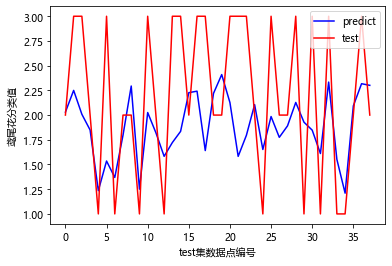

In [94]:

plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_test)),y_test,'r',label="test")
plt.legend(loc='upper right')
plt.xlabel("test集数据点编号")
plt.ylabel("鸢尾花分类值")
plt.show()